# Predicting the Result of League of Legends

# Summary of Findings


### Introduction

The result of a game is determined by many factors of the game. The average duration of a game is typically 30-45 mins. Leading us to our classification predition problem: Predict the result of a game, whether the team wins or not, using information available at the first 10 mins of the entire match. Since we are using the result of a game as the target variable, we want to make sure our accuracy is as high as possible so we have decided to use accuracy as our evaluation metric/ objective.

### Baseline Model
we took a look in to many features when building our baseline model. During our investigation, we have eliminated a few features including bans and champion names. At first galance, it might seen to be a good feature to use. But after some reasearch about leauge and taking game patch in to an account, we notice that it might not be a good feature to predict the result of the game, since champion tier differs for different patchs. For our baseline model, we used 10 features, in which 2 are nominal, 6 are quantitative and 2 are boolean categorical values. 

In the baseline model, we were able to achieve an accuracy of 0.711 for the training model, 0.696 for the test model. Base on this, we noticed that this might not be a good model since it might be an overfitted model. Therefore we have decided to perform grid search to find better parameters and to finalize our model.

### Final Model

One feature we have added is from binarizing the assistant at 10. we have decide to use a binarizer because we wanted to set a threshold of whether there are a lot of assistance or not. Also we have standard scaled the death at 10, becasue working with normalized data can help create a consistency among data. In the end, the type of model we chose is RandomForestClassifier. We chose this model because after trying differnt models and hypeparameters this model seems to work the best. The best parameters included crition 'entropy', max_depth of 10, and min_samples_split of 64. 

### Fairness Evaluation
We conducted a fairness analysis on whether our model performed better on shorter games than longer ones. The result of our permutation test indicated that our model had better performance on shorter games. This is reasonable given we only used variables avaiable at the first 10 mins of the match. 

# Code

In [448]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [449]:
lol_2022= pd.read_csv("LOL_2022.csv",low_memory=False)

In [450]:
lol_2022.head(3)

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0


# Indroduction

The result of a game is determined by many factors of the game. The average duration of a game is typically 30-45 mins. In this project, we would like to predict the result of a game, whether the team wins or not, using information available at the first 10 mins of the entire match. Our objective is to maximize the accuracy score.

### Baseline Model

#### we examin the columns of the data set and found some useful features we can take a look in to:
- golddiffat10: the gold diference at 10 mins
- ban1 - ban5: the 5 chapions that wer banned in the beginning of the game
- side: the side the team was on red/blue
- firstblood: a boolean value of wether the team got first blood
- fisrdragon: a boolean value of wether the team got first dragon 
- champion: the champion that were used in the match 
- killsat10: the number of kills at 10 mins
- csdiffat10: the differnce in minions and jungle monster kills
- deathsat10: the number of death at 10 mins


In [451]:
#champ_used=lol_2022.groupby(["gameid","side"])["champion"].apply(lambda x: list(x)[:-1]).reset_index()
#df=df.merge(champ_used, on=["gameid","side"], how="inner")
#df["champion"]=df["champion"].transform(lambda x: " ".join(x))

#### Observation:
After some investigation merging and putting this new column we created above in the pipeline, we found that champion and ban might not be the best feature to use. There are differnt patch of the games so past champion data might not reflect the furture.

In [452]:
# select features that we want to use
df=(lol_2022[lol_2022["position"]=="team"] [["side","golddiffat10",
    "firstblood","firstdragon","killsat10","csdiffat10","deathsat10","league","assistsat10","xpdiffat10","result"]])
df=df.dropna()
df_result=df["result"]
df=df.drop(columns="result")

In [453]:
# split the training data and the testing data by 0.75/0.25
from sklearn.model_selection import train_test_split

In [454]:
# importing from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [524]:
X_train, X_test, y_train, y_test = train_test_split(df, df_result,test_size=0.25)  

In [459]:
blpre = ColumnTransformer(
                remainder="passthrough",
                transformers=[
                    ('ohe_side', OneHotEncoder(drop="first",handle_unknown='ignore', dtype='int'),["side","league"]), 
                ])

blpl= Pipeline([
        ("pre_col", blpre),
        ('dtc', RandomForestClassifier(max_depth=6))
        ])

blpl.fit(X_train,y_train)
#pl.predict(X_test)
blpl.score(X_train,y_train),blpl.score(X_test,y_test)

(0.7114687360854908, 0.6968135851936653)

In the base line model we were able to achive a accuracy of 0.711 for the training model, 0.697 for the test model. Base on this we notice that this might be an overfitted model. Therefore we have decided to perform grid search to find better parameters and to finalize out model.

### Exploring Models

In [460]:
# these are some hypeparmeters we would liek to explore
hyperparams = {
    'dtc__max_depth': [4, 8,10,12,16, 32],
    'dtc__min_samples_split': [ 8, 16, 24, 32, 64],
    'dtc__criterion': ['gini', 'entropy']
}

In [242]:
grid_lol = GridSearchCV(pl, hyperparams, cv=5)
grid_lol.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_col',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_side',
                                                                         OneHotEncoder(drop='first',
                                                                                       dtype='int',
                                                                                       handle_unknown='ignore'),
                                                                         ['side',
                                                                          'league']),
                                                                        ('bi_golddiff',
                                                                         Binarizer(threshold=2),
                                                                         ['assistsat10'])])),
 

In [243]:
grid_lol.best_params_

{'dtc__criterion': 'entropy',
 'dtc__max_depth': 10,
 'dtc__min_samples_split': 64}

In [525]:
expre = ColumnTransformer(
                remainder="passthrough",
                transformers=[
                    ('ohe_side', OneHotEncoder(drop="first",handle_unknown='ignore', dtype='int'),["side","league"]),
                    ('bi_golddiff', Binarizer(threshold=2),["assistsat10"]),   
                ])

expl= Pipeline([
        ("pre_col", expre),
        ('dtc', RandomForestClassifier(criterion="entropy",max_depth=10,min_samples_split=64))
        ])

expl.fit(X_train,y_train)
#pl.predict(X_test)
expl.score(X_train,y_train),expl.score(X_test,y_test)


(0.7259080211182495, 0.7004388475481779)

Not only do we want to perform grid search on the basline model, but we also want to explore other possible models for prediction. Because many variables in our proposed model were quantitative data, after trying theRandomForestClassifier model , we wanted to use logistic regression to predict the binary result of a match.

In [526]:
lol_prepro = ColumnTransformer(
    transformers=[('ohe', OneHotEncoder(handle_unknown='ignore'),['side', 'league'])], remainder = 'passthrough')
lol_base_pl = Pipeline(
    steps = [('pre', lol_prepro), ('reg', LogisticRegression())])
lol_base_pl.fit(X_train, y_train)
lol_base_pl.score(X_train, y_train), lol_base_pl.score(X_test, y_test)

(0.7055530818650213, 0.7012020606754437)

In this model, we were able to achive a accuracy of 0.706 for the training model, 0.701 for the test model. 

### Final Models
after the exploration of models above, we have finalize our model:

In [541]:
from sklearn.preprocessing import StandardScaler

fnpre = ColumnTransformer(
                remainder="passthrough",
                transformers=[
                    ('ohe_side', OneHotEncoder(drop="first",handle_unknown='ignore', dtype='int'),["side","league"]),
                    ('bi_ass10', Binarizer(threshold=5),["assistsat10"]),
                    ('std_golddiff', StandardScaler(),["deathsat10"]),
                ])

fnpl= Pipeline([
        ("pre_col", fnpre),
        ('dtc', RandomForestClassifier(criterion="entropy",max_depth=10,min_samples_split=64))
        ])

fnpl.fit(X_train,y_train)
#pl.predict(X_test)
fnpl.score(X_train,y_train),fnpl.score(X_test,y_test)


(0.7243814006742574, 0.7044457164663233)

below are the statiscs of our models acuracy, precision and recall

In [542]:
from sklearn import metrics

In [543]:
y_pred = pl.predict(X_test)

In [544]:
metrics.accuracy_score(y_test, y_pred)

0.7189467658843732

In [545]:
metrics.precision_score(y_test, y_pred)

0.7185017026106697

In [546]:
metrics.recall_score(y_test, y_pred)

0.7226027397260274

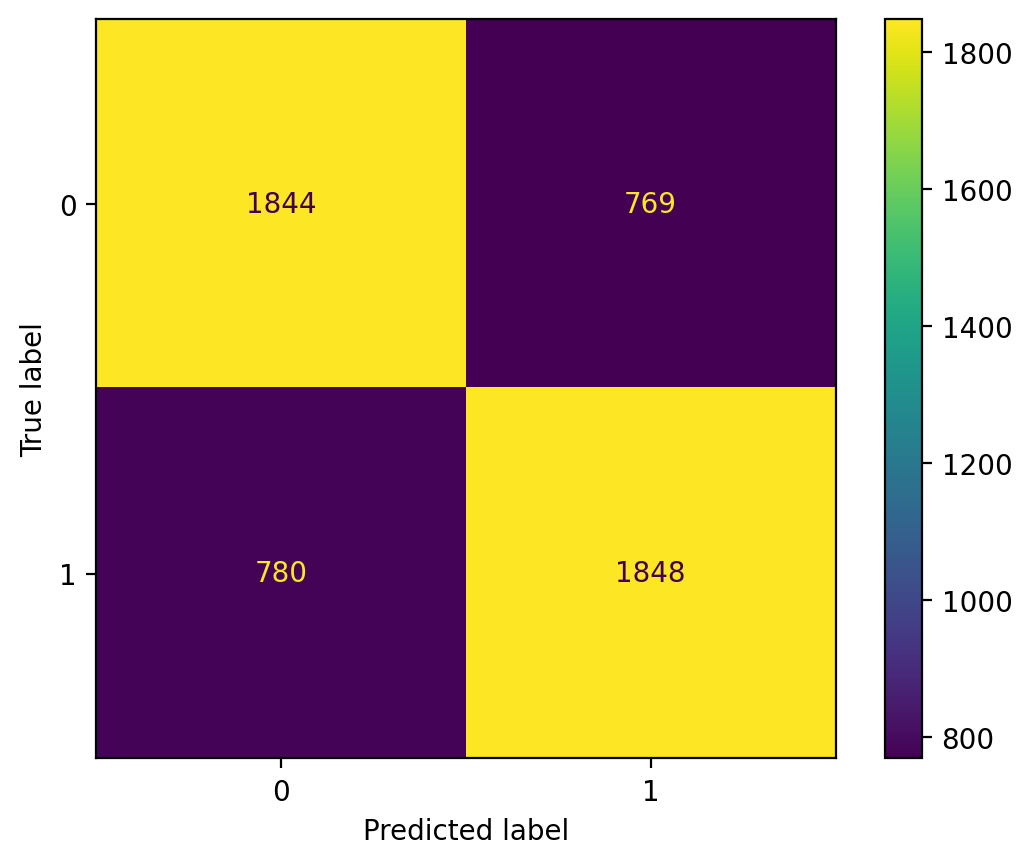

In [547]:
import warnings
warnings.filterwarnings('ignore')

metrics.plot_confusion_matrix(fnpl, X_test, y_test);

### Fairness Evaluation


Null hypothesis: my model is fair; the precision for long and short matches are roughly the same

Alternative hypothesis: my model is unfair, the precision for short matches are higher than long matches

<AxesSubplot:ylabel='Frequency'>

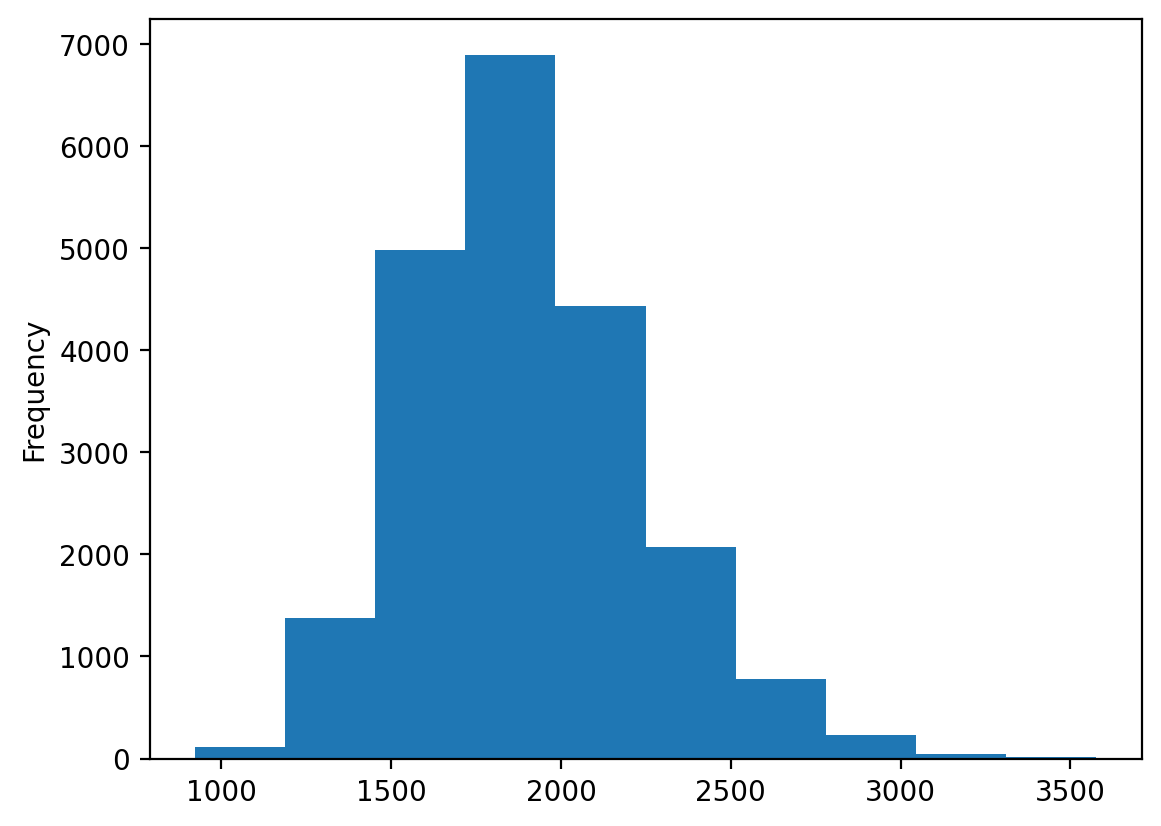

In [392]:
df_fair = (lol_2022[lol_2022["position"]=="team"]
      [["side","golddiffat10","firstblood","firstdragon","xpdiffat10",
    "killsat10","assistsat10","csdiffat10","deathsat10", 'league', 'result', 'gamelength']]
     .dropna())
game_len_mean = df_fair['gamelength'].mean()
df_fair['gamelength'].plot(kind = 'hist')


Since the graph of game length seems to be normal, we will consider every match with length below or equal to the mean game length to be short.

In [399]:
short_match = df_fair[df_fair['gamelength'] <= game_len_mean]
long_match = df_fair[df_fair['gamelength'] > game_len_mean]

In [400]:
short_match_X = short_match.drop(columns='result')
short_match_y = short_match['result']
long_match_X = long_match.drop(columns='result')
long_match_y = long_match['result']

In [ ]:
# by this observation we can already see that there is a significant difference between long and short matches.

In [387]:
fnpl.predict(short_match_X),pl.score(short_match_X,short_match_y)

(array([1, 0, 0, ..., 1, 1, 0]), 0.8132373351839001)

In [388]:
fnpl.predict(long_match_X),pl.score(long_match_X,long_match_y)

(array([0, 1, 1, ..., 0, 1, 0]), 0.601123595505618)

In [401]:
df_fair_shuffle = df_fair.copy()
pl_scores = []
for i in range(500):
    df_fair_shuffle['gamelength'] = np.random.permutation(df_fair['gamelength'].values)
    short_match_shuffle = df_fair_shuffle[df_fair_shuffle['gamelength'] <= game_len_mean]
    short_match_shuffle_X = short_match_shuffle.drop(columns='result')
    short_match_shuffle_y = short_match_shuffle['result']
    pl_scores.append(fnpl.score(short_match_shuffle_X, short_match_shuffle_y))

In [447]:
(pl_scores >= fnpl.score(short_match_X, short_match_y)).mean()

0.0

##### Conclusion
Based on the p-value, we reject the null hypothesis and concluded that our model is unfair. The precision for short LOL matches is higher than which of the long LOL matches. This unfariness is expected because we only used data availble at the first 10 mins of the game. The tendency for the team to win could change as the game goes on. Including data after the first 10 mins would boost our prediction on winning of the team. However, these info could be unaviable for some short games, and we want to be able to predict the result of the match as early as possible instead of predicting it only when the game already ends.